In [1]:
# # Baita Cite it first: “Data Page: Number of recorded natural disaster events”, part of the following publication: Hannah Ritchie, Pablo Rosado and Max Roser (2022) - “Natural Disasters”. Data adapted from EM-DAT, CRED / UCLouvain. Retrieved from https://ourworldindata.org/grapher/number-of-natural-disaster-events [online resource]

#  for excessing the data online, while can also download it
# # import pandas as pd
# import requests


# # Fetch the data.
# df = pd.read_csv("https://ourworldindata.org/grapher/natural-disasters-by-type.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# # Fetch the metadata
# metadata = requests.get("https://ourworldindata.org/grapher/natural-disasters-by-type.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [2]:
# import pandas as pd

# # Fetch the data
# df = pd.read_csv(
#     "https://ourworldindata.org/grapher/natural-disasters-by-type.csv?v=1&csvType=full&useColumnShortNames=true",
#     storage_options={'User-Agent': 'Our World In Data data fetch/1.0'}
# )

# # Inspect the first few rows
# print(df.head())
# print(df.info())
# # 

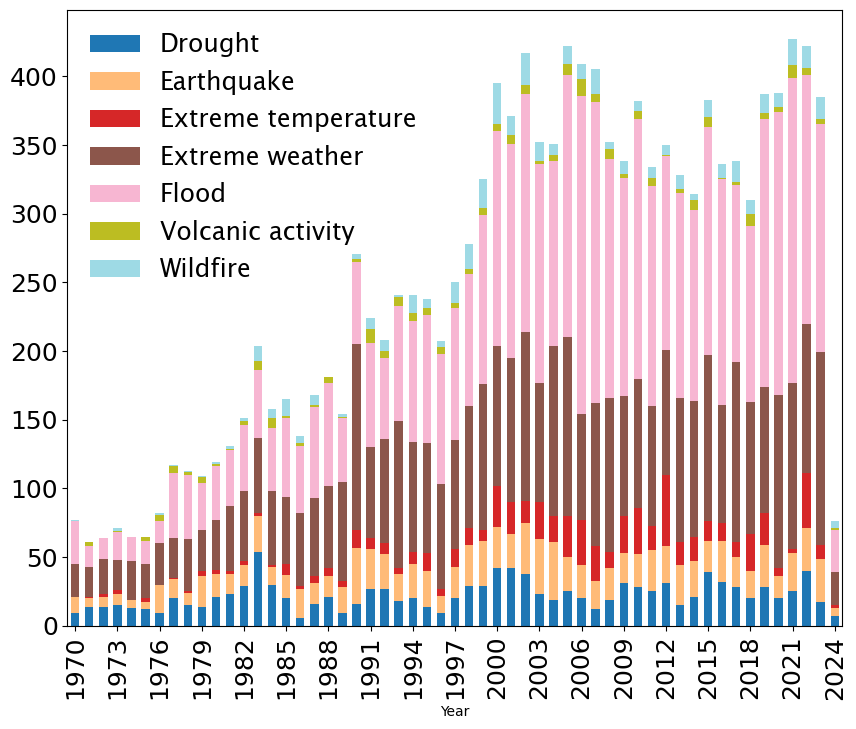

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data
df = pd.read_csv("natural-disasters-by-type_reduced.csv")

# Filter out 'All disasters' and pivot the data for stacking
filtered_df = df[df["Entity"] != "All disasters"]
pivoted_df = filtered_df.pivot(index="Year", columns="Entity", values="n_events").fillna(0)

# Plot a stacked bar chart
ax = pivoted_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8),
    colormap="tab20",
    width=0.6
)

#  the x-axis years as multiples of 5
ax.set_xticks(range(0, len(pivoted_df), 3))  #  every 5th year
ax.set_xticklabels(pivoted_df.index[::3])  #  corresponding year labels

# Set font family and size for all elements
plt.rcParams.update({'font.family': 'Lucida Sans', 'font.size': 18}) 

# # Set plot title and labels
# plt.title("Natural Disasters by Type Over Time", fontsize=22)
# plt.xlabel("Year", fontsize=22)
# plt.ylabel("Number of Events", fontsize=22)

# Increase font size for x and y tick labels
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)


# Adjust legend size and position
plt.legend(fontsize=18, frameon=False, loc="upper left")


plt.savefig("1 Extreme_Events_Trends.pdf")
plt.show()

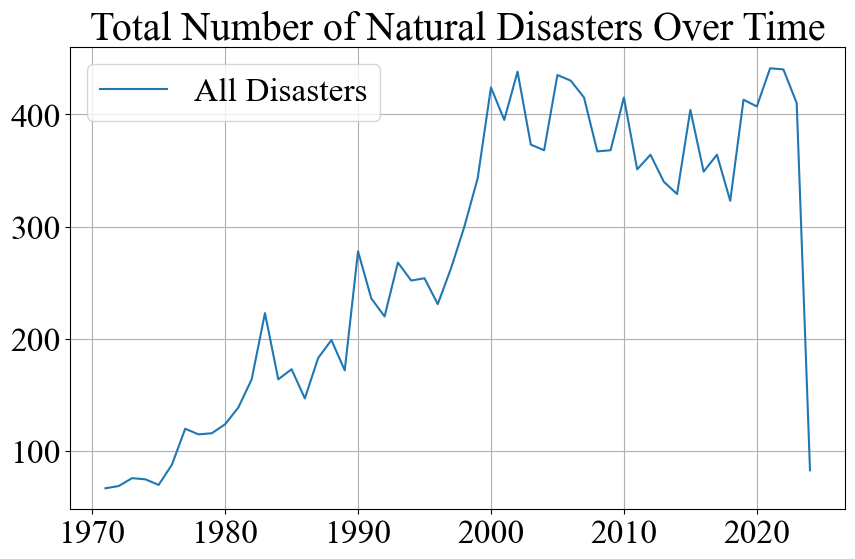

In [14]:
import matplotlib.pyplot as plt

# Filter data for "All disasters"
all_disasters = df[df["Entity"] == "All disasters"]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(all_disasters["Year"], all_disasters["n_events"], label="All Disasters")
# plt.xlabel("Year")
# plt.ylabel("Number of Events")
plt.title("Total Number of Natural Disasters Over Time")
plt.legend()
plt.grid()
plt.show()


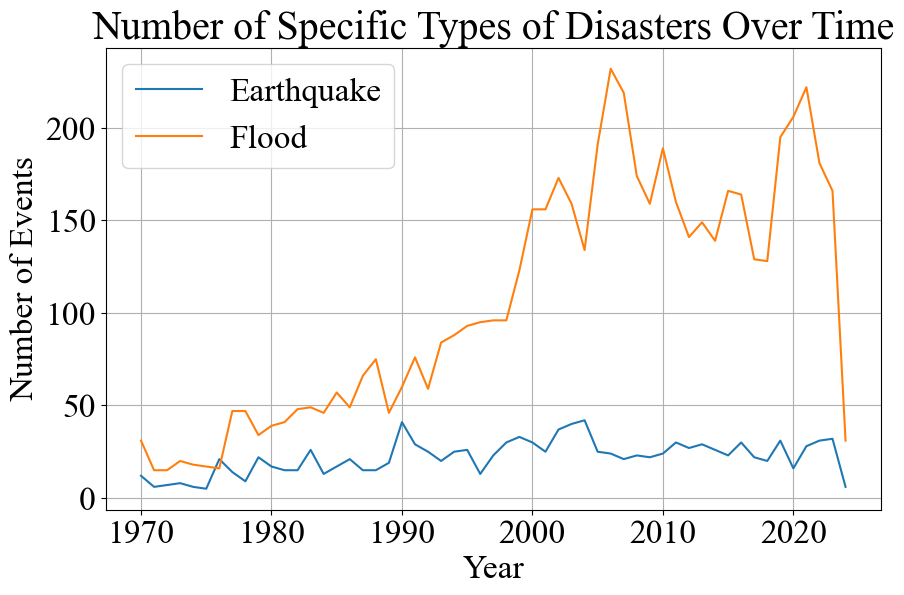

In [5]:
# Filter data for specific disaster types 

disaster_types = df[df["Entity"].isin(["Earthquake", "Flood", "Storm"])]

# Plot the data
plt.figure(figsize=(10, 6))
for entity in disaster_types["Entity"].unique():
    subset = disaster_types[disaster_types["Entity"] == entity]
    plt.plot(subset["Year"], subset["n_events"], label=entity)

plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Number of Specific Types of Disasters Over Time")
plt.legend()
plt.grid()
plt.show()


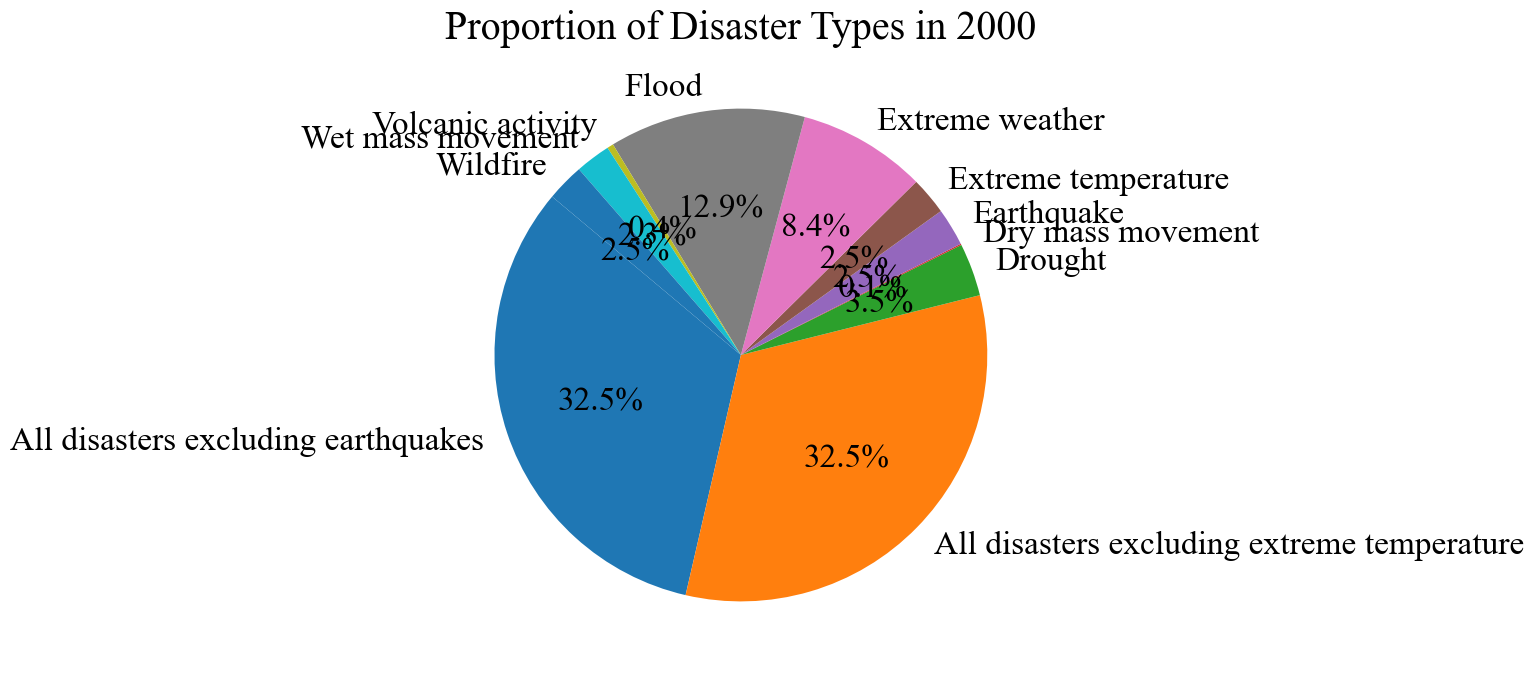

In [7]:
# Filter data for a specific year (e.g., 2022)
year_data = df[(df["Year"] == 2022) & (df["Entity"] != "All disasters")]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_data["n_events"], labels=year_data["Entity"], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Disaster Types in 2000")
plt.show()



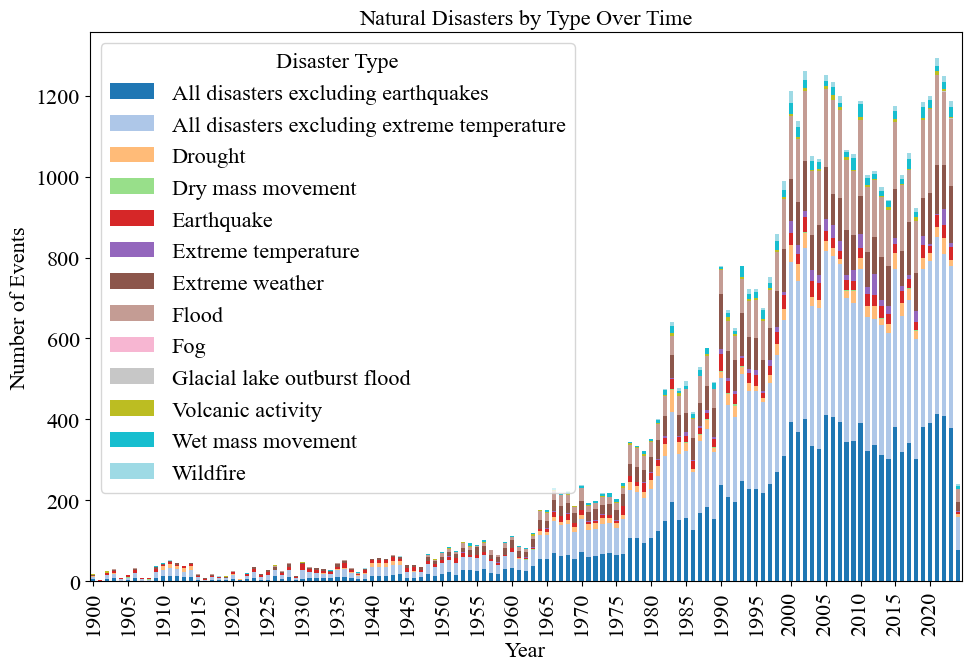

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data
df = pd.read_csv(
    "https://ourworldindata.org/grapher/natural-disasters-by-type.csv?v=1&csvType=full&useColumnShortNames=true",
    storage_options={'User-Agent': 'Our World In Data data fetch/1.0'}
)


filtered_df = df[df["Entity"] != "All disasters"]
pivoted_df = filtered_df.pivot(index="Year", columns="Entity", values="n_events").fillna(0)

# Plot a stacked bar chart
ax = pivoted_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 7),
    colormap="tab20",
    width=0.6
)

# Customize the x-axis to show years as multiples of 5
ax.set_xticks(range(0, len(pivoted_df), 5))  # Select every 5th year
ax.set_xticklabels(pivoted_df.index[::5])  # Show corresponding year labels

# Set font family and size for all elements
plt.rcParams.update({'font.family': 'times new roman', 'font.size': 16}) 

# Set plot title and labels
plt.title("Natural Disasters by Type Over Time", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Events", fontsize=16)

# Increase font size for x and y tick labels
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Adjust legend size and position
plt.legend(title="Disaster Type", fontsize=16, bbox_to_anchor=(0.0, 1), loc="upper left")

# Tight layout for better spacing
plt.tight_layout()

plt.savefig("Extreme_Events_Trend.pdf")
plt.show()